In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from math import sqrt


%matplotlib inline

RANDOM_SEED = 17
df=pd.read_csv ('petrol_consumption.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB
Распределение целевой переменной
640    0.041667
577    0.041667
566    0.041667
524    0.041667
464    0.041667
704    0.020833
865    0.020833
571    0.020833
547    0.020833
487    0.020833
649    0.020833
644    0.020833
554    0.020833
561    0.020833
541    0.020833
498    0.020833
628    0.020833
631    0.020833
632    0.020833
635    0.020833
508    0.020833
574    0.020833
414    0.020833
603    0.020833
540    0.020833
78

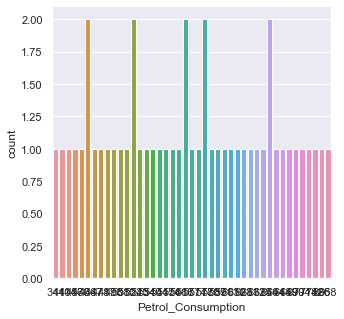

In [81]:
df.info()
print ('Распределение целевой переменной')
sns.set(rc={'figure.figsize':(5, 5)})
print(df['Petrol_Consumption'].value_counts(normalize=True))
#гистограмма целевая переменная
fig,ax=plt.subplots()
sns.countplot(x=df['Petrol_Consumption'], ax=ax)
plt.show()


In [82]:
#train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
#                                      n_features=2, random_state=RANDOM_SEED,
#                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
#def get_grid(data):
#    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
#    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

X=df.drop(columns=['Petrol_Consumption'])
y=df['Petrol_Consumption']
X_train, X_valid, y_train, y_valid=train_test_split(X,y, train_size=0.7, random_state=42)

reg_tree = DecisionTreeRegressor(random_state=42)

In [85]:
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_valid)


print("Decision tree regressor, MSE = %.2f" % np.sum((y_valid - y_pred) ** 2))


Decision tree regressor, MSE = 116068.00


In [79]:
y_pred = clf_tree.predict(X_valid)




NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [62]:
xx=pd.DataFrame([2.04378,-0.38422,1.437292,0.76421]).T
y_pred = clf_tree.predict(xx)

In [86]:
rms = sqrt(mean_squared_error(y_valid, y_pred))

In [87]:
rms

87.96514461232168

In [92]:
reg_tree.tree_.max_depth

11